### Code to preprocess fixations.csv from pupil labs andb plot speed and orientation of sacades

In [54]:
import sys
sys.path.append('../../')
from pyeyemo.gaze.eye import Eye
import pyeyemo.gaze.gaze_commons as gm
import pandas as pd
from pathlib import Path
from itertools import compress
import os
import numpy as np
from os import listdir
from os.path import isfile, join,isdir
import matplotlib.pyplot  as plt


## Get the list of directories we want to analyse and copy paste the information in sessions.tx


In [55]:

session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS")
# session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0001\SESSIONS")

data_path=Path(r"data/complex/") #folder whre csvs sill be saved
sessions=[]
df_list_fixations=[]
subjects=[]
annotation_list=['Asset','Surprise','Control'] # list of names that have assets
exported_number_fixations_csv=data_path.joinpath('number_fixations.csv') 

onlyfiles = [f for f in listdir(session_location) if isdir(join(session_location, f))]
for dir in onlyfiles:
 print (dir,flush=True)
 

0ES0004_S001_PC
0ES0004_S003_PC
0ES0004_S005_PC
0ES0004_S006_PC
0ES0004_S009_PC
0ES0004_S010_PC
0ES0004_S013_PC
0ES0004_S014_PC
0ES0004_S015_PC
0ES0004_S016_PC
0ES0004_S017_PC
0ES0004_S018_PC
0ES0004_S024_PC
0ES0004_S025_PC
0ES0004_S027_PC
0ES0004_S028_PC
0ES0004_S029_PC
0ES0004_S030_PC
backups
ES0004_S002_PC
ES0004_S004_PC
ES0004_S007_PC
ES0004_S008_PC
ES0004_S011_PC
ES0004_S012_PC
ES0004_S019_PC
ES0004_S020_PC
ES0004_S021_PC
ES0004_S022_PC
ES0004_S023_PC
ES0004_S026_PC
ES0004_S031_PC
ES0004_S032_PC


### Do the automatic analysis for sacades extraction

In [56]:
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()
# session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]
session_loc_list=[session_location.joinpath(session,'01 Processing_data') for session in sessions ]


for session, recording_location in zip(sessions,session_loc_list):

    data_paths=gm.extract_session_path_pupil_labs(recording_location=recording_location,
                                       subject=session)
    
    annotations_csv = data_paths['annotations']
    fixations_csv = data_paths['fixations']
    fixations_surf_csv = data_paths['fixations_surf']
    exported_gaze_csv=data_path.joinpath(f'{session}_saccades.csv') 


    # Now isntantitate an eye object and do the operations
    subject=Eye(session)
    print(f'Analiysing session: {subject.name}, annotations: {annotations_csv}, gaze: {fixations_csv}')

    subject.load_fixations(fixations_dir=fixations_surf_csv)
    subject.load_annotations(annotation_dir=annotations_csv)
    subject.label_data_annotation()
    subject.eliminate_duplicates(df=subject.fixations)
    subject.calculate_distance()
    subject.calculate_speed_saccades()
    subject.saccade_angle(angle='degrees_0_360')
    subject.vertical_horizontal_sacades()
    subject.group_data()
    subject.group_data_on_surface()
    subject.labels_to_analyse(annotation_list)
    subject.filter_labels(subject.annotations['label'])
    subject.number_fixations_on_off_surface()
    subject.average_saccade_distance()
    subject.average_sacade_speed()
    subject.average_fixation_time()
    subject.total_fixation_time()
    subject.test_data_table()

    ## Finally remove first row and only keep true surface values
    # All callculations are done with prepend, so we must allways delete 
    # the firs row previos to analysis
    subject.fixations=(subject.fixations.iloc[1:,:]
               # .query('on_surf == false')
                )

    #Also remove .tiff from assets
    subject.fixations['asset']=subject.fixations['asset'].str.replace('.tiff','').str.replace('.tif','')
    subject.data_matrix['asset']=subject.data_matrix['asset'].str.replace('.tiff','').str.replace('.tif','')

    subject.fixations.to_csv(exported_gaze_csv,index=False)
    df_list_fixations.append(subject.data_matrix)
    subjects.append(subject)
df_list_fixations_concat_df=pd.concat(df_list_fixations,axis=0)
df_list_fixations_concat_df.to_csv(exported_number_fixations_csv,index=False)

    

['002']
Analiysing session: 0ES0004_S001_PC, annotations: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS\0ES0004_S001_PC\01 Processing_data\002\exports\001\annotations.csv, gaze: P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\00 COMPLETED\Exp_Stgo_0004_Real_pots\03_EXP004_SESSIONS\0ES0004_S001_PC\01 Processing_data\002\exports\001\fixations.csv
annotations are correct


C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\2959447253.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  subject.fixations['asset']=subject.fixations['asset'].str.replace('.tiff','').str.replace('.tif','')
C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\2959447253.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject.fixations['asset']=subject.fixations['asset'].str.replace('.tiff','').str.replace('.tif','')
C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\2959447253.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  subject.data_matrix['asset']=subject.data_matrix['asset'].str.replace('.tiff','').str.replace('.tif','')


In [57]:
subject.fixations['asset']=subject.fixations['asset'].str.replace('.tif','')
a=subject.fixations['asset']

C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\3619894410.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  subject.fixations['asset']=subject.fixations['asset'].str.replace('.tif','')
C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\3619894410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject.fixations['asset']=subject.fixations['asset'].str.replace('.tif','')


In [58]:
np.unique(subject.annotations['label'])

array(['Obj0218_Asset0046', 'Obj0219_Asset0047', 'Obj0220_Asset0048',
       'Obj0221_Asset0049', 'Obj0222_Asset0050', 'Obj0223_Asset0046',
       'Obj0224_Asset0047', 'Obj0225_Asset0048', 'Obj0226_Asset0049',
       'Obj0227_Asset0050', 'Obj0228_Asset0048', 'Obj0229_Asset0077',
       'Obj0230_Asset0078', 'Obj0231_Asset0079', 'end_of_stimulation'],
      dtype=object)

In [59]:
np.unique(subject.annotations['label'])

array(['Obj0218_Asset0046', 'Obj0219_Asset0047', 'Obj0220_Asset0048',
       'Obj0221_Asset0049', 'Obj0222_Asset0050', 'Obj0223_Asset0046',
       'Obj0224_Asset0047', 'Obj0225_Asset0048', 'Obj0226_Asset0049',
       'Obj0227_Asset0050', 'Obj0228_Asset0048', 'Obj0229_Asset0077',
       'Obj0230_Asset0078', 'Obj0231_Asset0079', 'end_of_stimulation'],
      dtype=object)

In [60]:
df=subject.fixations



In [76]:
df['x_diff']=np.ravel(np.diff([df.norm_pos_x.values],prepend=0))
df['y_diff']=np.ravel(np.diff([df.norm_pos_y.values],prepend=0))
df['cartesian']=df.apply(lambda row: complex(row['x_diff'],row['y_diff']),axis=1)
df['cartesian_angle']=df.apply(lambda row: np.arctan2(row['cartesian'].imag,row['cartesian'].real),axis=1)
df['cartesian_distance']=abs(df['cartesian'])
df['cartesina_0_2pi']=np.mod(df['cartesian_angle'], 2 * np.pi)
df['cartesina_0_2pi_deg']=df['cartesina_0_2pi']*(180/np.pi)


C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\100220525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff']=np.ravel(np.diff([df.norm_pos_x.values],prepend=0))
C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\100220525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_diff']=np.ravel(np.diff([df.norm_pos_y.values],prepend=0))
C:\Users\arturoV\AppData\Local\Temp\ipykernel_9704\100220525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [62]:
len(np.diff([df.norm_pos_x],prepend=0)[0])

741

In [63]:
np.diff([df.norm_pos_x],prepend=0)

array([[ 5.70526600e-01, -9.36076641e-02, -1.56692266e-02,
         1.42115355e-02, -9.15458798e-03,  1.11589432e-02,
         3.92377377e-04,  3.16220674e+00,  1.85273170e+00,
        -4.69205153e+00,  6.31671250e+00, -1.62227058e+00,
        -2.16108084e+00,  2.56445408e-02, -4.87315655e-02,
         1.32302284e-01, -5.58110476e-01,  2.74020195e-01,
        -2.58670413e+00,  3.16078663e-01,  3.13056707e-02,
        -4.52051759e-02,  1.65773630e-02, -1.60303295e-01,
        -1.73787475e-02, -1.86829805e-01, -7.66502917e-02,
         2.53825784e-02,  1.35675073e-03, -1.80439949e-02,
         3.76508534e-01,  3.14700603e-02,  1.12402439e-03,
        -2.17536092e-02,  9.79989767e-03,  8.46118927e-02,
        -3.71476293e-01, -4.61471677e-02,  8.78130198e-02,
        -1.54157281e-02, -1.28751993e-03,  2.57633924e-02,
        -3.60209346e-02,  1.44267082e-02,  2.24822760e-03,
        -4.78219986e-03,  4.16287184e-02, -5.12856245e-03,
        -3.25149894e-02, -2.62216926e-02,  1.07458174e-0

In [77]:
df

,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,...,angle_rad,angle,verticality,x_diff,y_diff,cartesian,cartesian_angle,cartesian_distance,cartesina_0_2pi,cartesina_0_2pi_deg
4,-506807.525665,4,1,-506807.518713,103.5205,1.420780,0.570527,0.647068,0.570527,0.647068,...,0.490209,28.086924,0,0.570527,0.647068,0.570527+0.647068j,0.848178,0.862669,0.848178,48.597028
8,-506807.397300,8,2,-506807.399172,149.9825,1.459441,0.476919,0.611730,0.476919,0.611730,...,-2.780628,200.681723,0,-0.093608,-0.035337,-0.093608-0.035337j,-2.780628,0.100056,3.502557,200.681723
14,-506806.981053,21,3,-506806.995133,496.0855,1.061435,0.461250,0.605110,0.461250,0.605110,...,-2.741849,202.903626,0,-0.015669,-0.006620,-0.015669-0.006620j,-2.741849,0.017010,3.541336,202.903626
30,-506806.489692,36,4,-506806.495043,499.8670,1.174967,0.475461,0.612460,0.475461,0.612460,...,0.477296,27.347058,0,0.014212,0.007350,0.014212+0.007350j,0.477296,0.016000,0.477296,27.347058
47,-506805.779458,58,5,-506805.769109,262.0340,1.453582,0.466307,0.598065,0.466307,0.598065,...,-2.137243,237.544998,1,-0.009155,-0.014395,-0.009155-0.014395j,-2.137243,0.017059,4.145942,237.544998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,-506440.462288,12470,1215,-506440.470518,161.9860,1.154749,0.875741,0.348158,0.875741,0.348158,...,1.589937,91.096702,1,-0.000652,0.034035,-0.000652+0.034035j,1.589937,0.034041,1.589937,91.096702
4963,-506440.300284,12475,1216,-506440.304600,100.0895,1.385056,0.833700,0.322778,0.833700,0.322778,...,-2.598470,211.118657,0,-0.042041,-0.025380,-0.042041-0.025380j,-2.598470,0.049108,3.684716,211.118657
4967,-506440.205245,12478,1217,-506440.200603,238.0750,1.439641,0.819515,0.317650,0.819515,0.317650,...,-2.794674,199.876966,0,-0.014185,-0.005128,-0.014185-0.005128j,-2.794674,0.015083,3.488511,199.876966
4975,-506439.745574,12491,1218,-506439.744587,368.0680,1.488297,0.473433,0.285670,0.473433,0.285670,...,-3.049449,185.279434,0,-0.346082,-0.031980,-0.346082-0.031980j,-3.049449,0.347556,3.233736,185.279434


In [122]:
df

,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,...,angle_rad,angle,verticality,x_diff,y_diff,cartesian,cartesian_angle,cartesian_distance,cartesina_0_2pi,cartesina_0_2pi_deg
4,-506807.525665,4,1,-506807.518713,103.5205,1.420780,0.570527,0.647068,0.570527,0.647068,...,0.490209,28.086924,0,0.570527,0.647068,0.570527+0.647068j,0.848178,0.862669,0.848178,48.597028
8,-506807.397300,8,2,-506807.399172,149.9825,1.459441,0.476919,0.611730,0.476919,0.611730,...,-2.780628,200.681723,0,-0.093608,-0.035337,-0.093608-0.035337j,-2.780628,0.100056,3.502557,200.681723
14,-506806.981053,21,3,-506806.995133,496.0855,1.061435,0.461250,0.605110,0.461250,0.605110,...,-2.741849,202.903626,0,-0.015669,-0.006620,-0.015669-0.006620j,-2.741849,0.017010,3.541336,202.903626
30,-506806.489692,36,4,-506806.495043,499.8670,1.174967,0.475461,0.612460,0.475461,0.612460,...,0.477296,27.347058,0,0.014212,0.007350,0.014212+0.007350j,0.477296,0.016000,0.477296,27.347058
47,-506805.779458,58,5,-506805.769109,262.0340,1.453582,0.466307,0.598065,0.466307,0.598065,...,-2.137243,237.544998,1,-0.009155,-0.014395,-0.009155-0.014395j,-2.137243,0.017059,4.145942,237.544998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,-506440.462288,12470,1215,-506440.470518,161.9860,1.154749,0.875741,0.348158,0.875741,0.348158,...,1.589937,91.096702,1,-0.000652,0.034035,-0.000652+0.034035j,1.589937,0.034041,1.589937,91.096702
4963,-506440.300284,12475,1216,-506440.304600,100.0895,1.385056,0.833700,0.322778,0.833700,0.322778,...,-2.598470,211.118657,0,-0.042041,-0.025380,-0.042041-0.025380j,-2.598470,0.049108,3.684716,211.118657
4967,-506440.205245,12478,1217,-506440.200603,238.0750,1.439641,0.819515,0.317650,0.819515,0.317650,...,-2.794674,199.876966,0,-0.014185,-0.005128,-0.014185-0.005128j,-2.794674,0.015083,3.488511,199.876966
4975,-506439.745574,12491,1218,-506439.744587,368.0680,1.488297,0.473433,0.285670,0.473433,0.285670,...,-3.049449,185.279434,0,-0.346082,-0.031980,-0.346082-0.031980j,-3.049449,0.347556,3.233736,185.279434


## Important
Matplotlib polar plot angles must o in radians


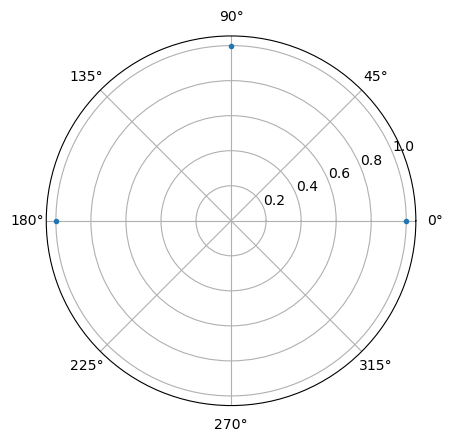

In [169]:
angles=subject.fixations['angle']
distance=subject.fixations['distance']
r = np.linspace(0, 2, angles.shape[0])
angle=[0,np.pi,np.pi/2]
radius=[1,1,1]
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(subject.fixations['angle'], distance,'.')
ax.plot(angle, radius,'.')

# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

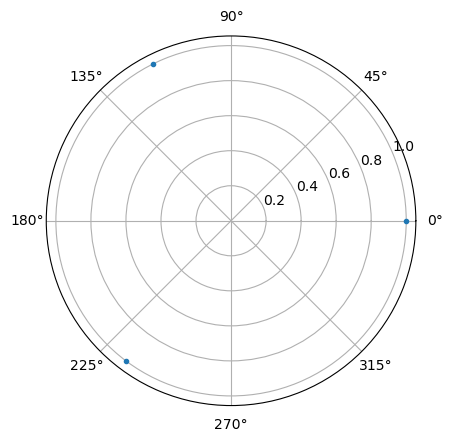

In [170]:
angles=subject.fixations['angle']
distance=subject.fixations['distance']
r = np.linspace(0, 2, angles.shape[0])
angle=[0,180,90]
radius=[1,1,1]
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(subject.fixations['angle'], distance,'.')
ax.plot(angle, radius,'.')

# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

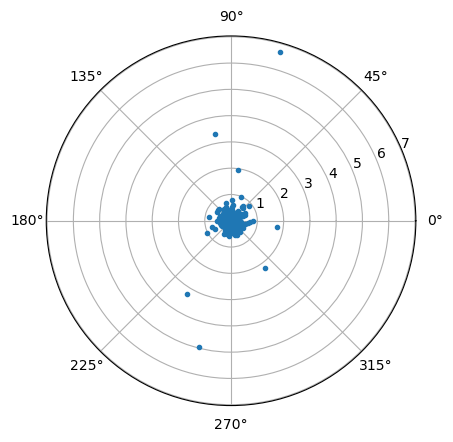

In [171]:
angles=df['angle']
distance=df['cartesian_distance']
r = np.linspace(0, 2, angles.shape[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(subject.fixations['angle'], distance,'.')
ax.plot(angles, distance,'.')

# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

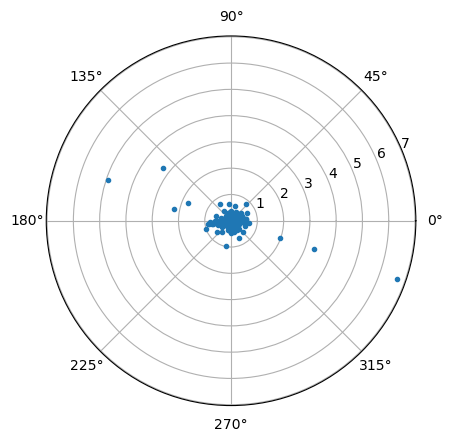

In [172]:

angles=df['cartesian_angle']
# Ensure angles are in the range [0, 2*pi)
# distance=np.ones(angles.shape[0])
distance=df['cartesian_distance']
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(subject.fixations['angle'], distance,'.')
ax.plot(angles, distance,'.')

# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)


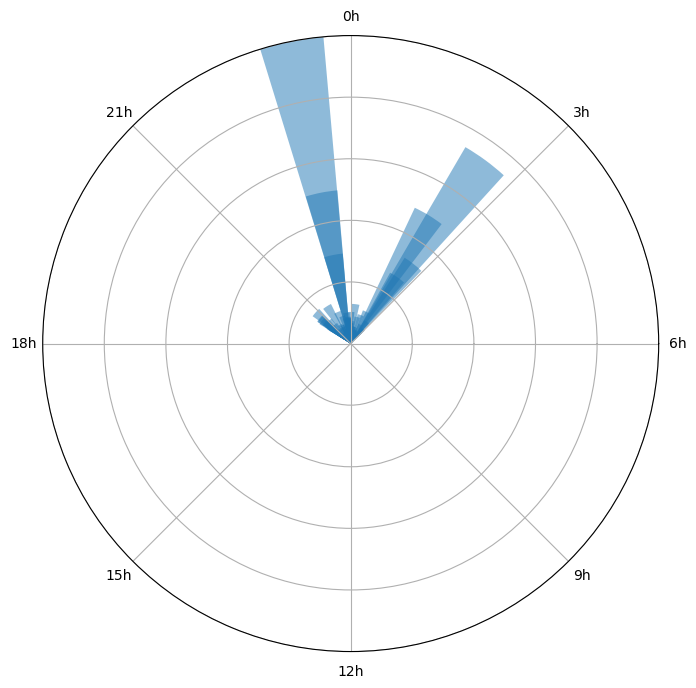

In [152]:
import pycircular
angles=df['cartesian_angle']
distance=df['distance']
fig, ax1 = pycircular.plots.base_periodic_fig(angles, distance)


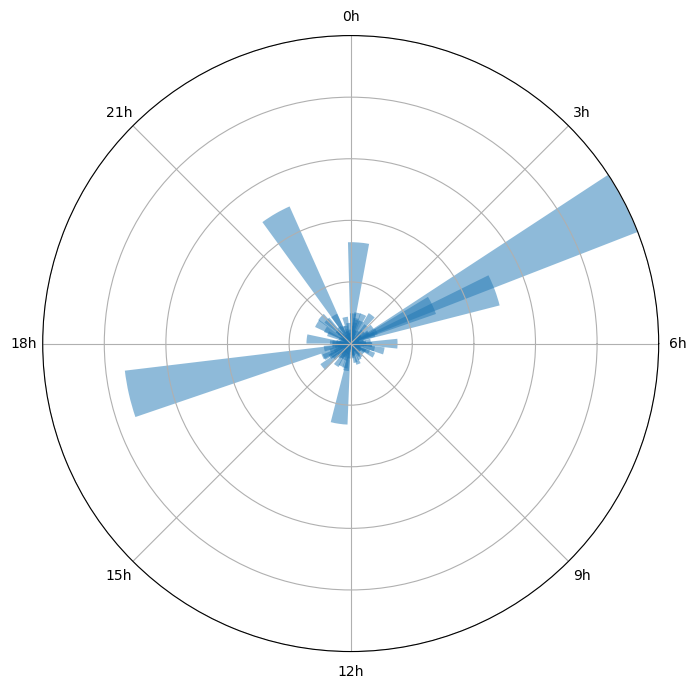

In [160]:
import pycircular
angles=df['angle']
distance=df['distance']
fig, ax1 = pycircular.plots.base_periodic_fig(angles, distance)

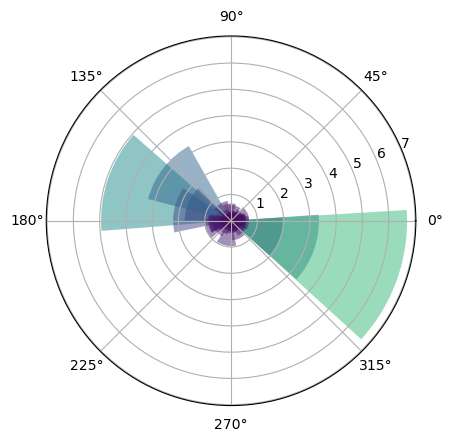

In [161]:
import matplotlib.pyplot as plt
import numpy as np


# Compute pie slices
N = 20
theta = df['cartesian_angle']
radii =df['distance']
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, bottom=0.0, color=colors, alpha=0.5)

plt.show()

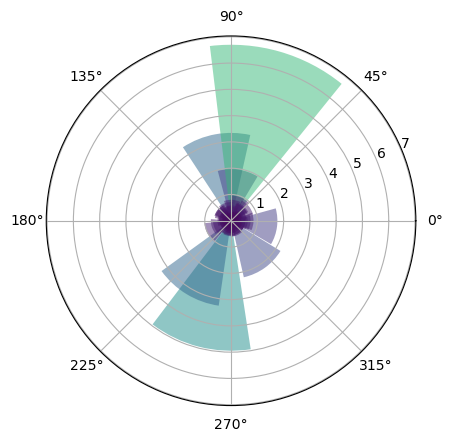

In [163]:
import matplotlib.pyplot as plt
import numpy as np


# Compute pie slices
N = 20
theta = df['angle']
radii =df['distance']
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, bottom=0.0, color=colors, alpha=0.5)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Compute pie slices
N = 20
theta = df['angle']
radii =df['distance']
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, bottom=0.0, color=colors, alpha=0.5)

plt.show()

In [145]:
angles

4       0.848178
8      -2.780628
14     -2.741849
30      0.477296
47     -2.137243
          ...   
4957    1.589937
4963   -2.598470
4967   -2.794674
4975   -3.049449
4987   -0.213980
Name: cartesian_angle, Length: 741, dtype: float64

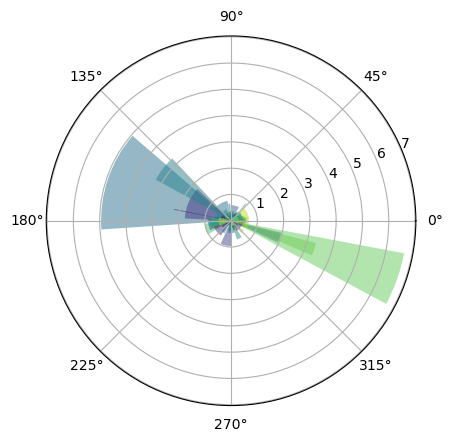

In [109]:
angles=df['cartesian_angle']
magnitudes=df['cartesian_distance']
r = np.linspace(0, 2, angles.shape[0])
N =angles.shape[0]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)
ax.bar(angles, magnitudes, width=width, bottom=0.0, color=colors, alpha=0.5)

# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

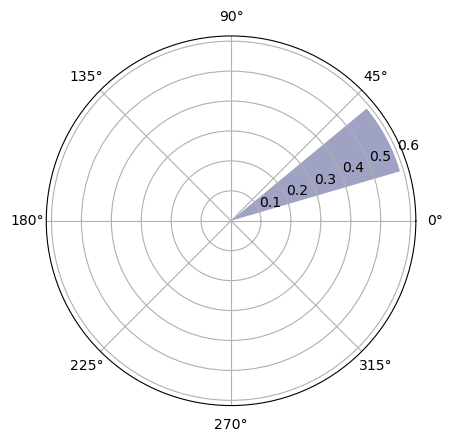

In [68]:
final_vector=np.sum(df['cartesian'])
angles=np.arctan2(final_vector.imag,final_vector.real)
magnitudes=abs(final_vector)
r = np.linspace(0, 2, 1)
N =1

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)
ax.bar(angles, magnitudes, width=width, bottom=0.0, color=colors, alpha=0.5)

# ax.set_rmax(2)
# ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
# ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

In [146]:
angles.shape

()

In [144]:
angles=np.arctan2(final_vector.imag,final_vector.real)
magnitudes=abs(final_vector)
angles

0.4878952918577688

In [139]:
final_vector=np.sum(df['cartesian'])
final_vector

(0.5194563269615174+0.2756690680980675j)

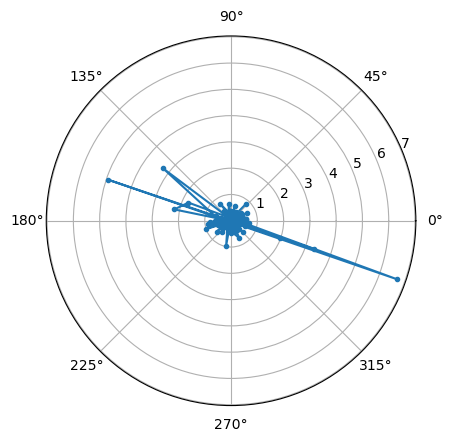

In [132]:
plt.polar(angles, magnitudes, marker='.')


In [137]:
import matplotlib.pyplot as plt
import math

# create equispaced angles (in radians)
xs = [i / len(y) * 2 *math.pi  for i in range(len(y))]
# to make a good circle, duplicate the first entry
xs.append(0)
y.append(y[0])
# plot
plt.polar(xs, y)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [8]:
import cmath
a=2+1j
cmath.phase(a)

0.4636476090008061